Looking at Metrics and Plots Made From the Command Line
-------------------------------------------------------

Following the getting started guide we have run a pipeline from the command line to produce the coadd quality core plots and metrics.

In [1]:
from lsst.analysis.tools.tasks.reconstructor import reconstructAnalysisTools
import lsst.daf.butler as dafButler
from lsst.analysis.tools.interfaces._task import _StandinPlotInfo

import numpy as np

Let's read back in the data that we just made

In [2]:
collection = "/sdf/group/rubin/u/sr525/coaddQualityCoreDemoRepo"
dataId = {"tract": 9813, "skymap": "hsc_rings_v1"}
Butler = dafButler.Butler("/sdf/group/rubin/user/bechtol/bootcamp_2023_backup/rc2_subset/SMALL_HSC/")

The reconstructor contains all of the plots/metrics that we just made, we specify the label and that gives us just the ones in that section of the pipeline.

In [3]:
taskState, inputData = reconstructAnalysisTools(Butler, 
                                                collection=collection,
                                                label="analyzeObjectTableCore",
                                                dataId=dataId, 
                                                callback=None
)

Let's list the actions that were run

In [4]:
for action in taskState.atools:
    print(action.identity)

e1Diff
e2Diff
shapeSizeFractionalDiff
skyFluxStatisticMetric
skyObjectFlux
skyObjectSky
wPerpCModel
wPerpPSFP
xPerpCModel
xPerpPSFP
yPerpCModel
yPerpPSF


Now we can recreate them, we're going to pick one and look at it.

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-6.0.0/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


{'e1Diff_ScatterPlotWithTwoHists': <Figure size 1920x1440 with 4 Axes>,
 'e1Diff_i_highSNStars_median': Measurement('i_highSNStars_median', <Quantity nan pix>, notes={'i_highSNStars_median.metric_tags': []}),
 'e1Diff_i_highSNStars_sigmaMad': Measurement('i_highSNStars_sigmaMad', <Quantity nan pix>, notes={'i_highSNStars_sigmaMad.metric_tags': []}),
 'e1Diff_i_highSNStars_count': Measurement('i_highSNStars_count', <Quantity 0. ct>, notes={'i_highSNStars_count.metric_tags': []}),
 'e1Diff_i_lowSNStars_median': Measurement('i_lowSNStars_median', <Quantity 0.00052184 pix>, notes={'i_lowSNStars_median.metric_tags': []}),
 'e1Diff_i_lowSNStars_sigmaMad': Measurement('i_lowSNStars_sigmaMad', <Quantity 0.00336623 pix>, notes={'i_lowSNStars_sigmaMad.metric_tags': []}),
 'e1Diff_i_lowSNStars_count': Measurement('i_lowSNStars_count', <Quantity 223. ct>, notes={'i_lowSNStars_count.metric_tags': []})}

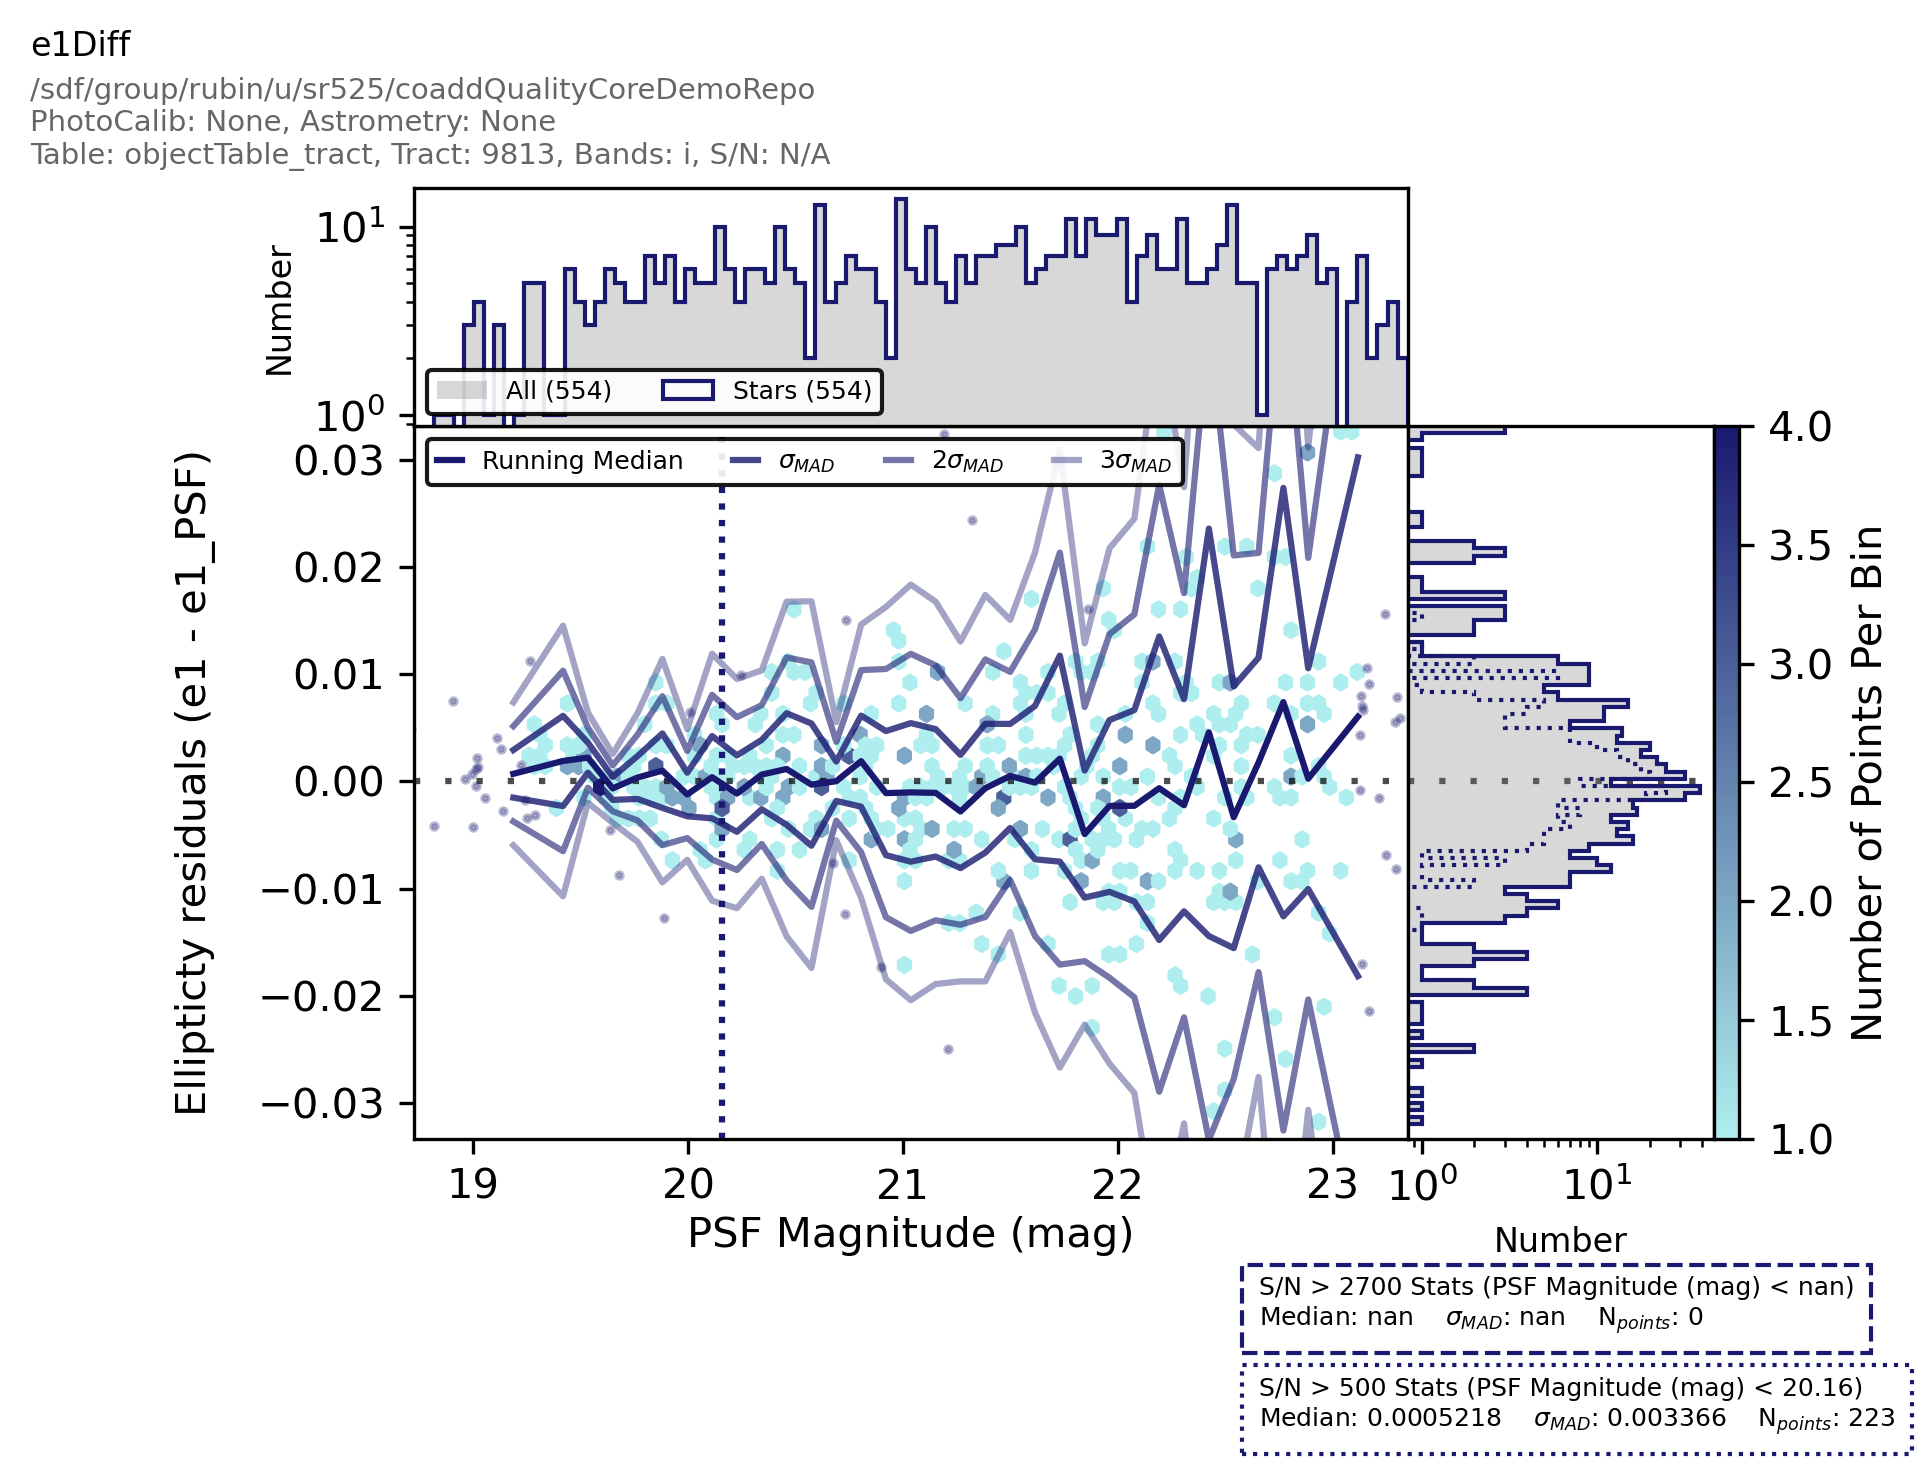

In [5]:
plotInfoDict = {"run": collection, "bands": "i", "tract": 9813, "tableName": "objectTable_tract"}
taskState.atools.e1Diff(inputData["data"], plotInfo=plotInfoDict, skymap=None, band="i")

Let's see the selectors that were used

In [6]:
for selector in taskState.atools.e1Diff.prep.selectors:
    print(selector.identity)

flagSelector
snSelector


We can look at each step individually

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-6.0.0/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


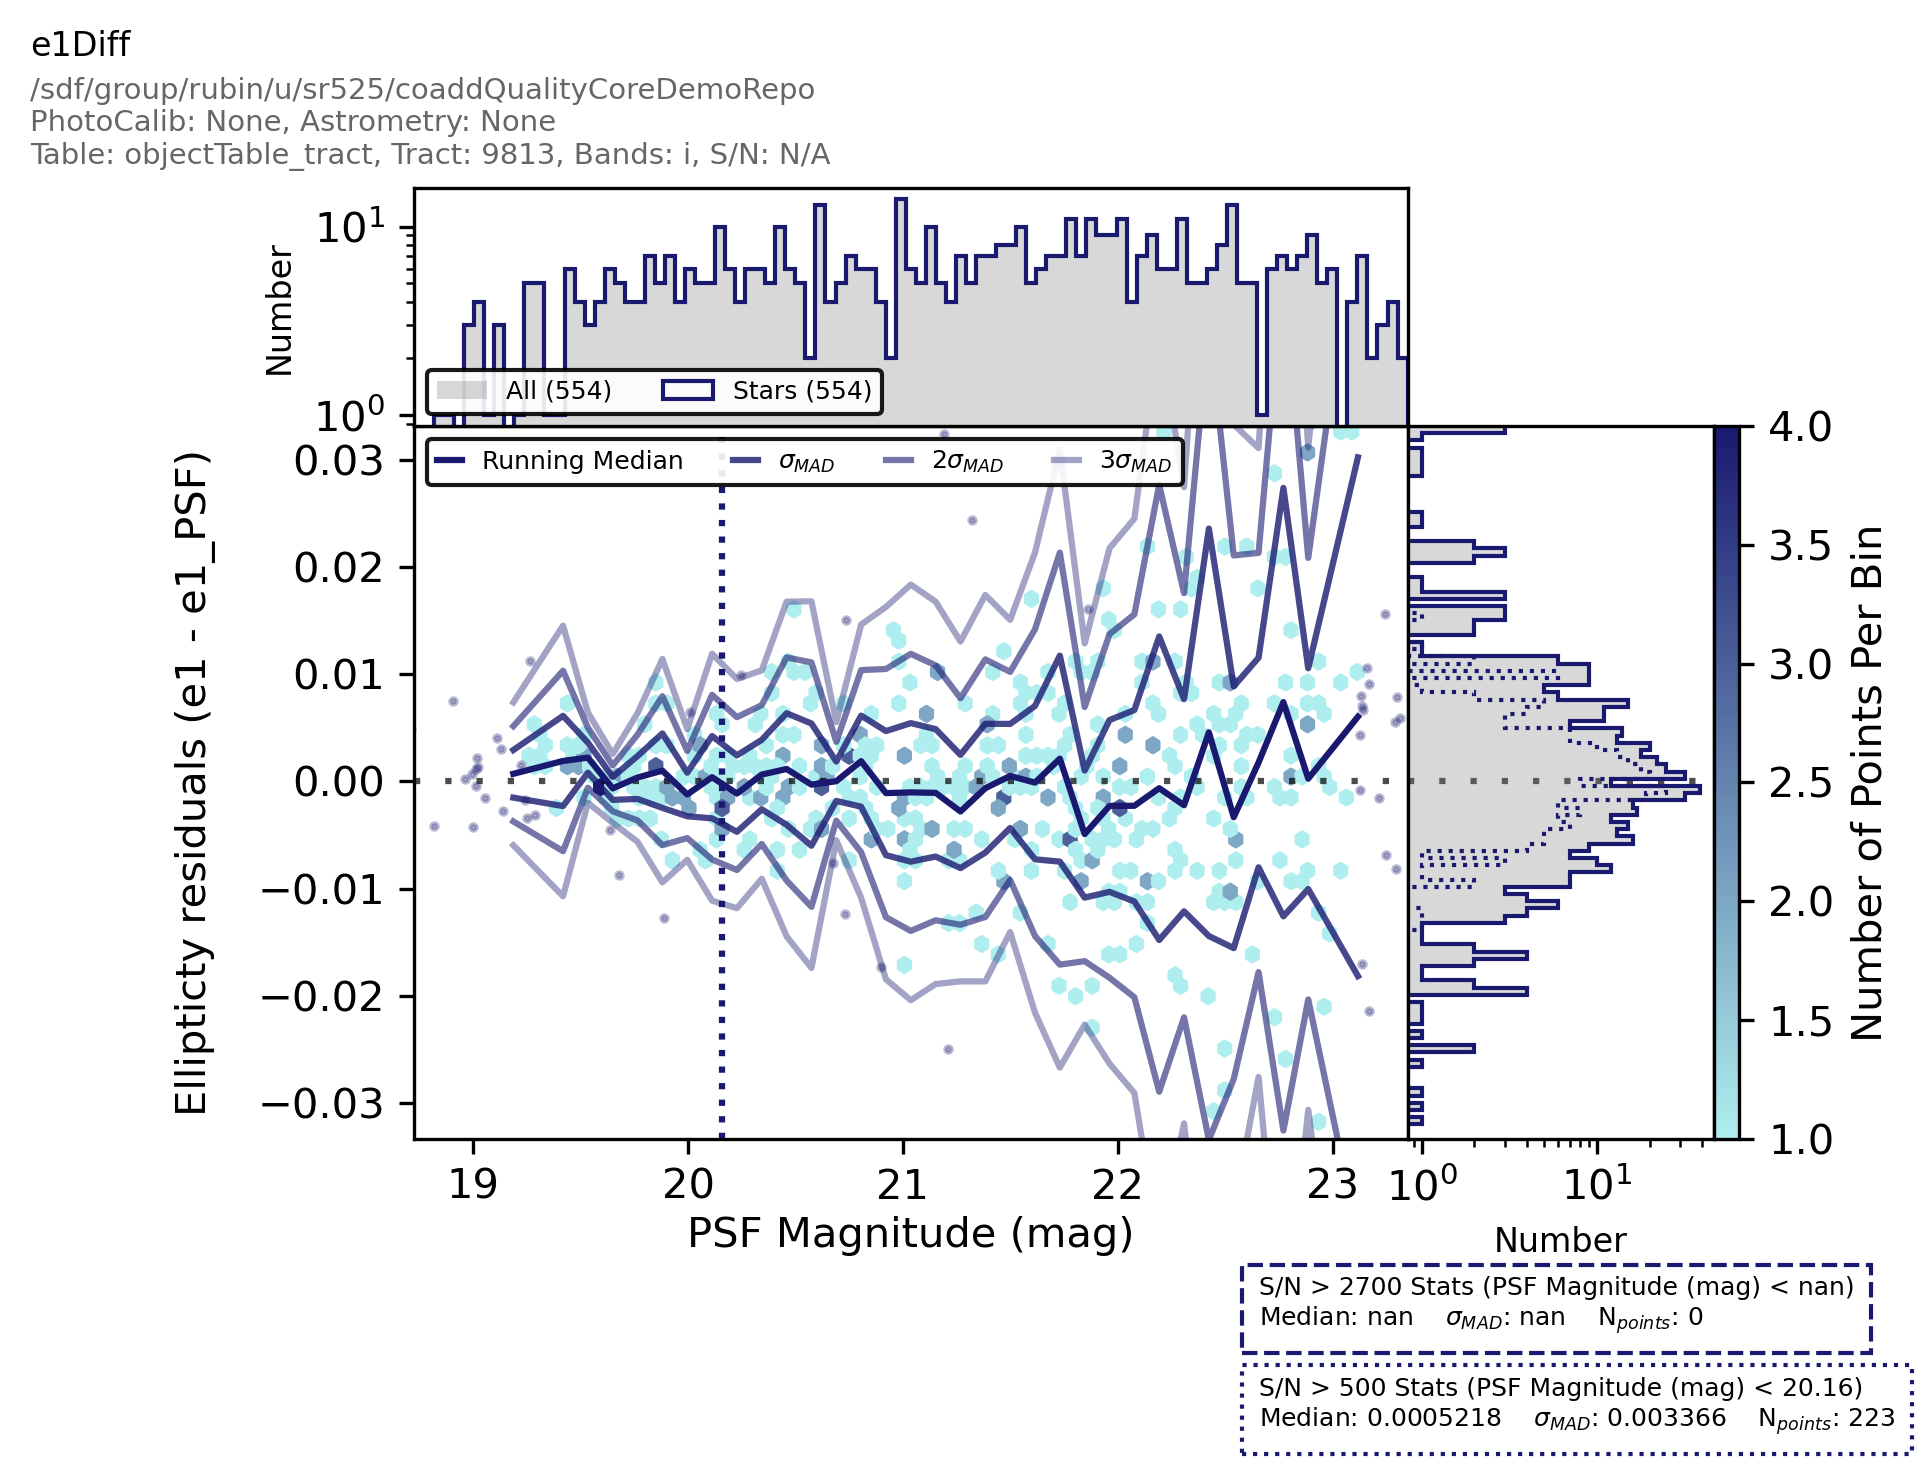

In [7]:
prep = taskState.atools.e1Diff.prep(inputData["data"], plotInfo=plotInfoDict, skymap=None, band="i")
#print("Prep:", prep)
process = taskState.atools.e1Diff.process(prep, band="i")
#print("Process:", process)
produce = taskState.atools.e1Diff.produce(process, band="i", plotInfo=plotInfoDict, skymap=None)
#print("Produce:", produce)

Let's change something about the selectors and then re run the plot

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-6.0.0/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


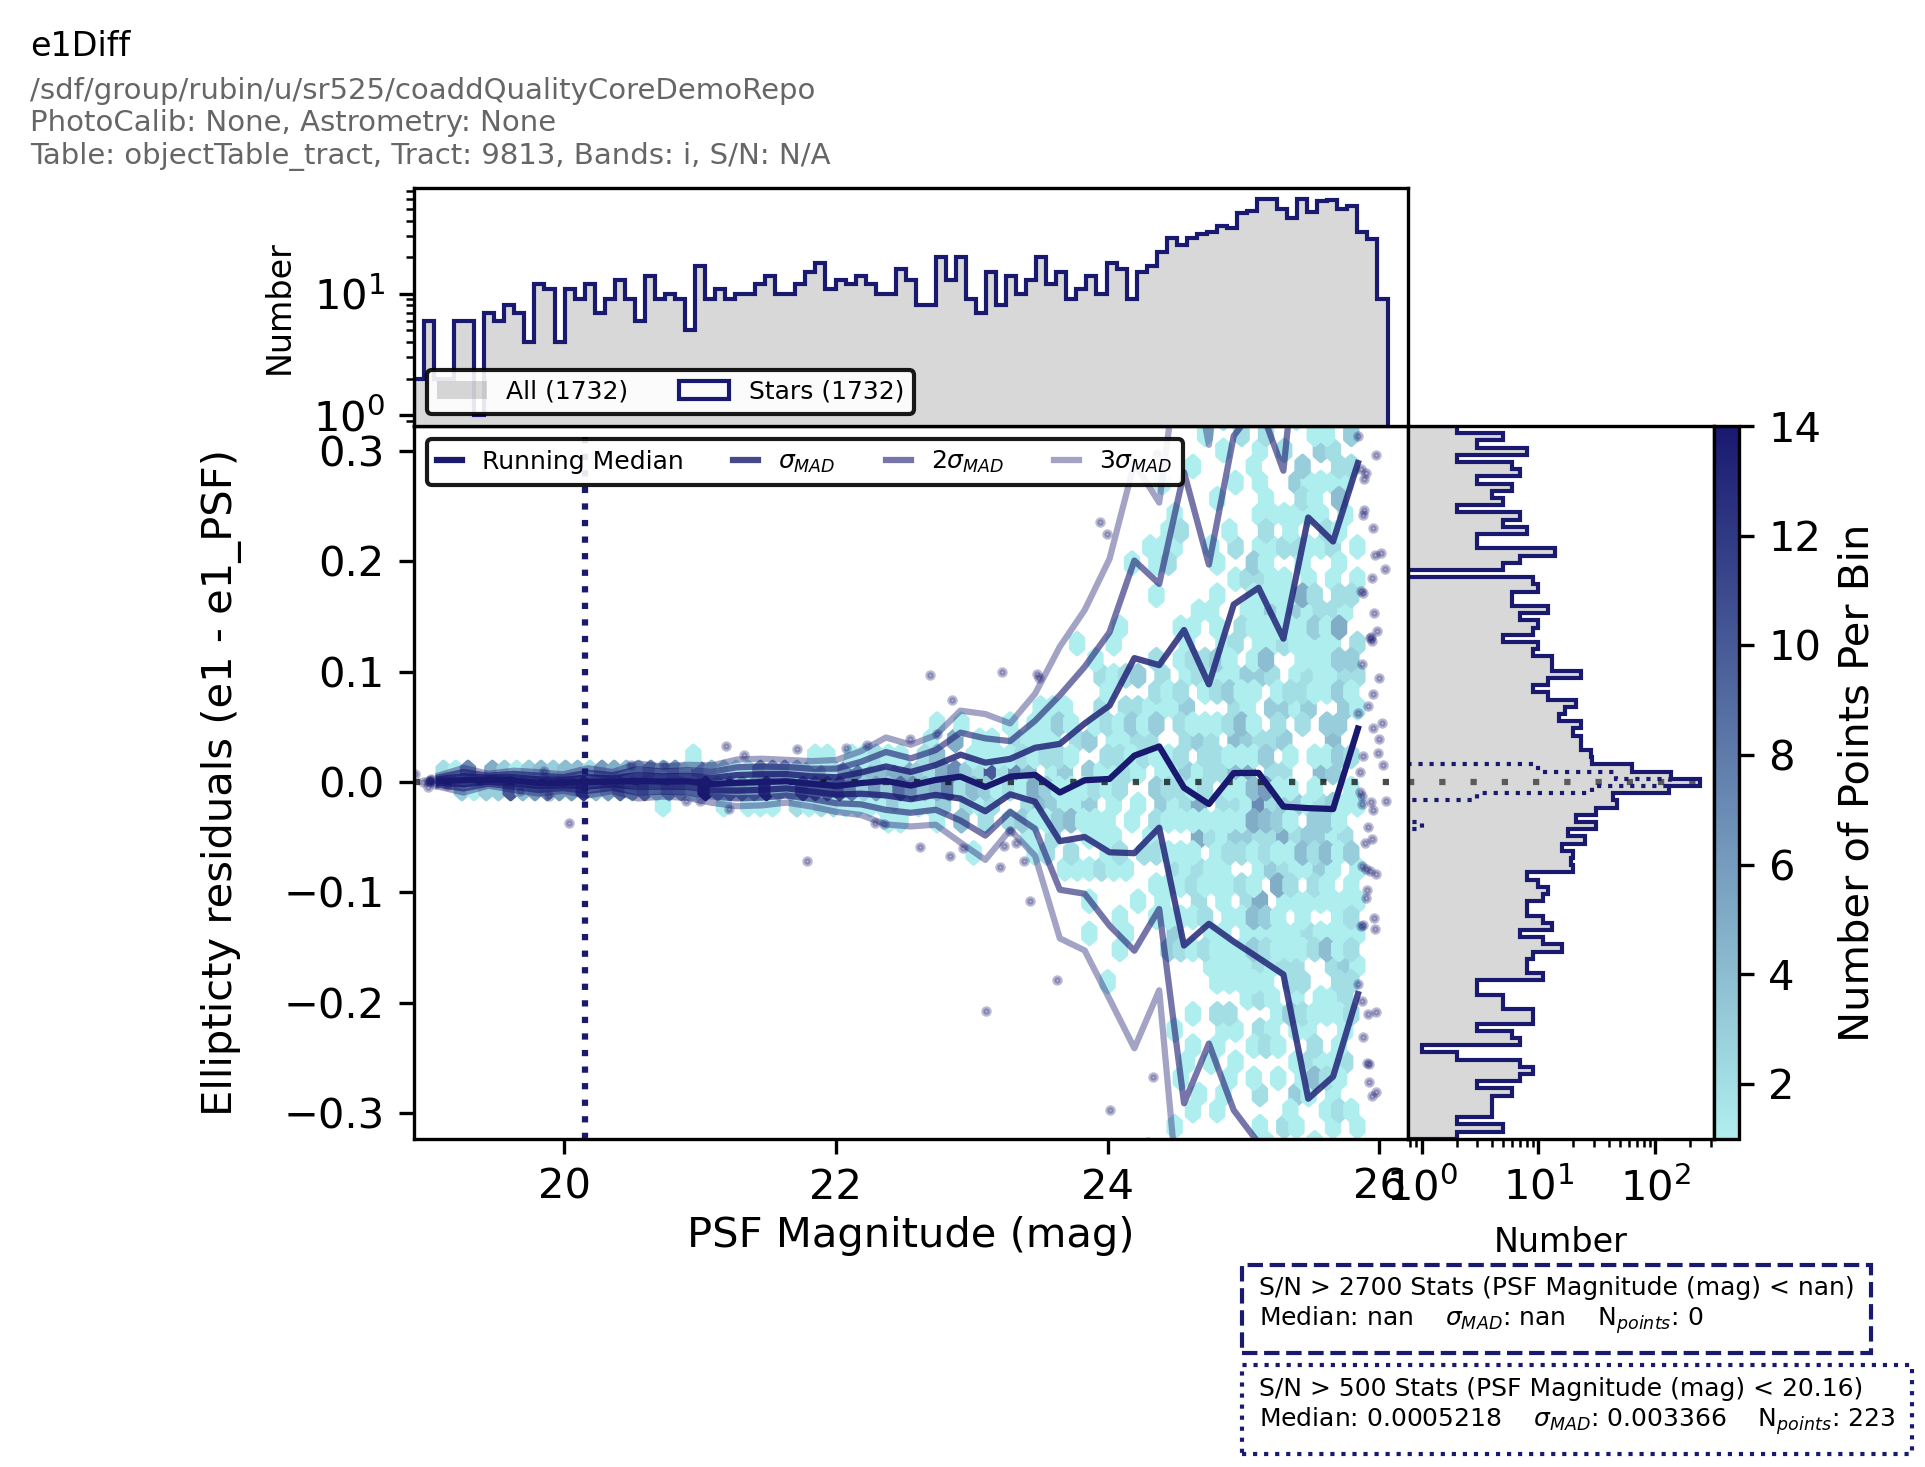

In [8]:
taskState.atools.e1Diff.prep.selectors.snSelector.threshold = 10
prep = taskState.atools.e1Diff.prep(inputData["data"], plotInfo=plotInfoDict, skymap=None, band="i")
process = taskState.atools.e1Diff.process(prep, band="i")
produce = taskState.atools.e1Diff.produce(process, band="i", plotInfo=plotInfoDict, skymap=None)